In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

## Урок

In [2]:
df = pd.read_csv('../data/03-1-airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df.index = pd.to_datetime(df.index)
df = df.asfreq('MS')

In [3]:
def pipeline(data, column, alpha, ):
    # Простое экспоненциальное сглаживание (SES)
    alpha = alpha
    model_ses = SimpleExpSmoothing(data[column]).fit(smoothing_level=alpha, optimized=False)
    data['SES'] = model_ses.fittedvalues 

    # Метод Хольта (двойное экспоненциальное сглаживание)
    model_holt = ExponentialSmoothing(data[column], trend='add').fit()
    data['Holt'] = model_holt.fittedvalues  

    # Метод Хольта-Винтерса (тройное экспоненциальное сглаживание)
    model_holt_winters = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=12).fit()
    data['Holt-Winters'] = model_holt_winters.fittedvalues  

    # Визуализация результатов
    fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

    # График простого экспоненциального сглаживания
    axes[0].plot(data[column], label='Оригинальный ряд')
    axes[0].plot(data['SES'], label='Простое экспоненциальное сглаживание (SES)', linestyle='--')
    axes[0].legend()
    axes[0].set_title('Простое экспоненциальное сглаживание')

    # График метода Хольта
    axes[1].plot(data[column], label='Оригинальный ряд')
    axes[1].plot(data['Holt'], label='Метод Хольта (двойное сглаживание)', linestyle='--')
    axes[1].legend()
    axes[1].set_title('Метод Хольта')

    # График метода Хольта-Винтерса
    axes[2].plot(data[column], label='Оригинальный ряд')
    axes[2].plot(data['Holt-Winters'], label='Метод Хольта-Винтерса (тройное сглаживание)', linestyle='--')
    axes[2].legend()
    axes[2].set_title('Метод Хольта-Винтерса')

    plt.tight_layout()
    plt.show();

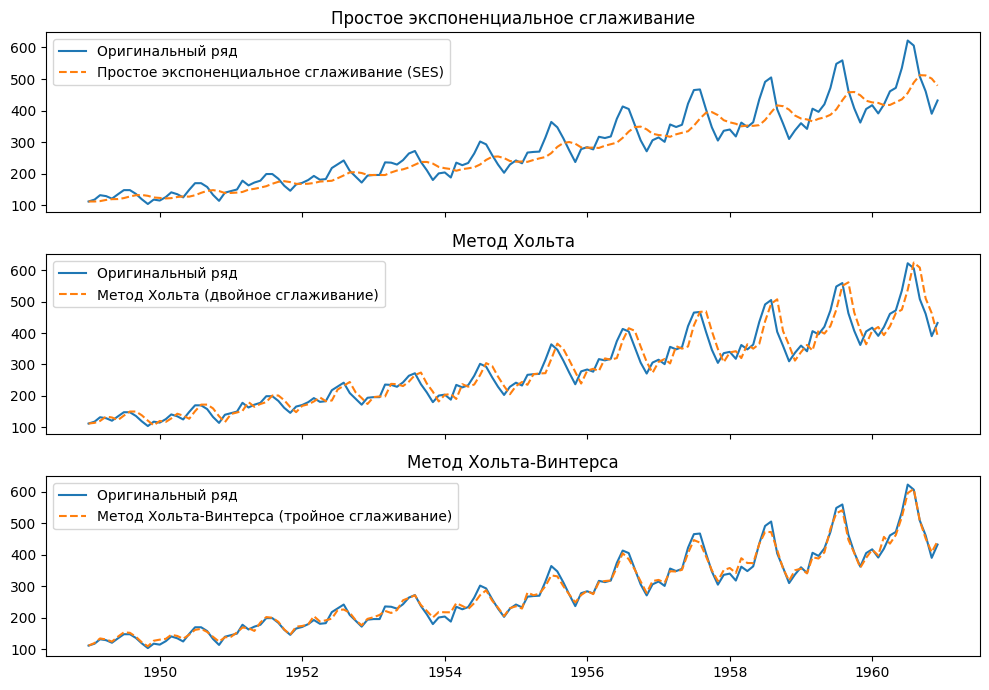

In [4]:
pipeline(data=df, column='Passengers', alpha=0.2)

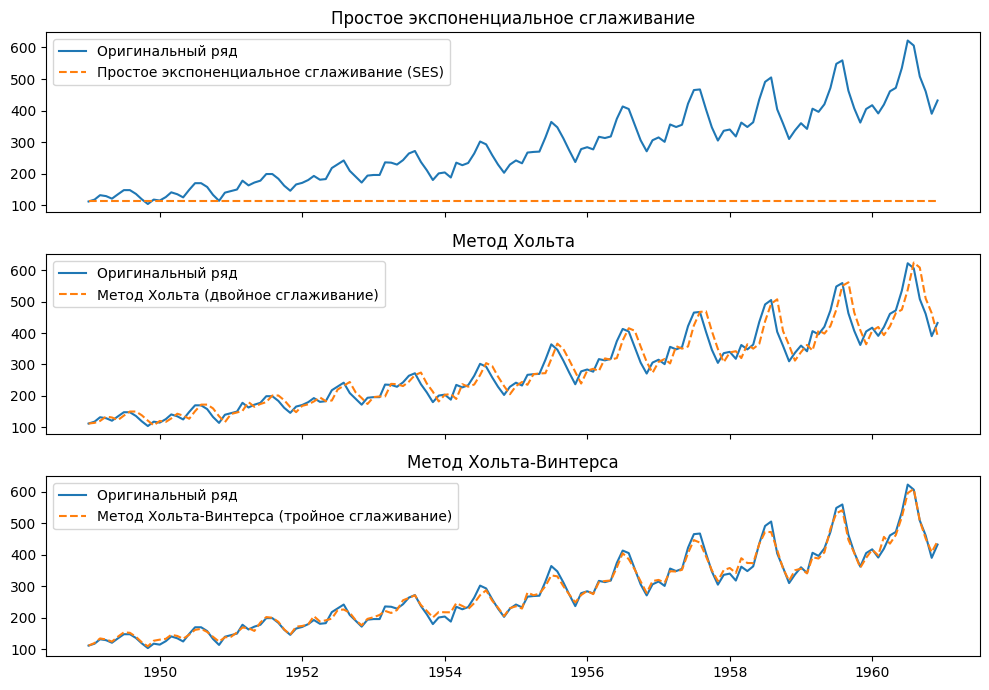

In [5]:
pipeline(data=df, column='Passengers', alpha=0)

## Задача 8

- Примените простое экспоненциальное сглаживание (SES) к курсу доллара (USD) для страны Australia с коэффициентом α = 0.2. 

In [6]:
df = pd.read_csv('../data/06-1-daily.csv')
df = df.query('Country=="Australia"')[['Date', 'Exchange rate']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df.rename(columns={'Exchange rate':'Value'}, inplace=True)
df

,Value
Date,
1971-01-04,0.898715
1971-01-05,0.898311
1971-01-06,0.897666
1971-01-07,0.897827
1971-01-08,0.898957
...,...
2018-10-08,NaN
2018-10-09,1.410039
2018-10-10,1.408451


In [7]:
alpha = 0.2
model_ses = SimpleExpSmoothing(df['Value']).fit(smoothing_level=alpha, optimized=False)
df['SES'] = model_ses.fittedvalues

- Выведите первое значение сглаженного ряда, округленное до двух знаков после запятой.

In [8]:
round(df['SES'].iloc[0],2)

np.float64(0.9)

## Задача 9

- Примените метод Хольта с аддитивным трендом к данным по авиаперевозкам.

In [9]:
df = pd.read_csv('../data/06-2-airtravel.csv')
df.columns = df.columns.str.replace('"', '')
df

,Month,1958,1959,1960
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472
5,JUN,435,472,535
6,JUL,491,548,622
7,AUG,505,559,606
8,SEP,404,463,508
9,OCT,359,407,461


In [10]:
df_melt = df.melt(
    id_vars='Month', 
    var_name='Year', 
    value_name='Value')

df_melt['Date'] = pd.to_datetime(
    df_melt['Year'].astype(str) + '-' + df_melt['Month'] + '-01'
)

df_melt.set_index('Date', inplace=True)
df_melt.asfreq('ME')
df_melt = df_melt[['Value']].copy()

df_melt.sample(5)

/var/folders/wb/4g8jd0z5523_swmb10tb_k7c0000gn/T/ipykernel_12451/431357902.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melt['Date'] = pd.to_datetime(


,Value
Date,
1958-04-01,348
1958-12-01,337
1960-07-01,622
1959-09-01,463
1959-12-01,405


In [12]:
# Метод Хольта (двойное экспоненциальное сглаживание)
model_holt = ExponentialSmoothing(df_melt['Value'], trend='add').fit()
df_melt['Holt'] = model_holt.fittedvalues  

# Метод Хольта-Винтерса (тройное экспоненциальное сглаживание)
model_holt_winters = ExponentialSmoothing(df_melt['Value'], trend='add', seasonal='add', seasonal_periods=12).fit()
df_melt['Holt-Winters'] = model_holt_winters.fittedvalues

/Users/skv/PycharmProjects/study-timeseries-analysis-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/skv/PycharmProjects/study-timeseries-analysis-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


- Выведите первое значение сглаженного ряда, округленное до двух знаков после запятой.

In [13]:
df_melt

,Value,Holt,Holt-Winters
Date,,,
1958-01-01,340,339.999711,335.290004
1958-02-01,318,342.628610,315.179568
1958-03-01,362,320.628610,361.644218
1958-04-01,348,364.628609,367.786719
1958-05-01,363,350.628610,376.515715
1958-06-01,435,365.628610,433.427827
1958-07-01,491,437.628609,507.058686
1958-08-01,505,493.628609,503.617409
1958-09-01,404,507.628610,405.839026
